In [4]:
import os
import numpy as np
import skimage.filters as sk_fi
import skimage.io as sk_io
import matplotlib.pyplot as plt

In [2]:
import PreprocessData
import os

os.chdir("../")
file_list = PreprocessData.PreprocessData.load_file_list(test_or_train="test", angio_or_structure="structure")

In [66]:
file = "/home/julius/dataspellprojects/oct-classifier/data/diabetic_structure/test_files/enf_1536x2048x2045x2_18832.png"

In [109]:
image1 = sk_io.imread(file)[200:404, 200:404]
#image2 = sk_io.imread(file_list[0][0])[:100, :100]

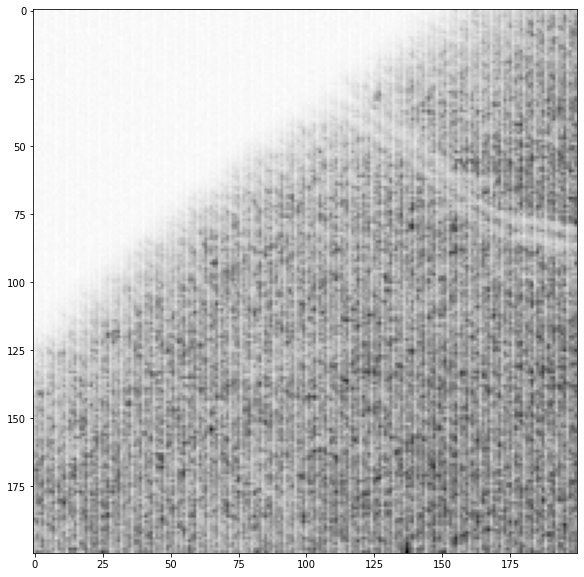

In [70]:
plt.figure(figsize=(10, 10))
plt.imshow(image1, "Greys")

In [42]:
diabetic_corr = []
healthy_corr = []

file_list = PreprocessData.PreprocessData.load_file_list(test_or_train="train", angio_or_structure="structure")
for file in file_list:
    image = sk_io.imread(file[0])[:100, :100]
    if file[1] == 1:
        diabetic_corr.append(np.nanmean(np.corrcoef(image)))
    else:
        healthy_corr.append(np.nanmean(np.corrcoef(image)))

KeyboardInterrupt: 

In [230]:
diabetic_corr_test = []
healthy_corr_test = []

file_list_test = PreprocessData.PreprocessData.load_file_list(test_or_train="test", angio_or_structure="structure")
for file in file_list_test:
    image = sk_io.imread(file[0])[:100, :100]
    if file[1] == 1:
        diabetic_corr_test.append(np.mean(np.corrcoef(sk_fi.rank.mean(image, np.ones((4, 4))))))
    else:
        healthy_corr_test.append(np.mean(np.corrcoef(sk_fi.rank.mean(image, np.ones((4, 4))))))

/home/julius/miniconda3/envs/tf-test/lib/python3.10/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/julius/miniconda3/envs/tf-test/lib/python3.10/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [13]:
from scipy.fft import fft2, ifft2
from scipy.fft import fft, ifft

# 3D Kernel:
def apply_kernel(data: np.array, kernel: np.array) -> np.array:
    """
    Applies 3x3 Kernel to 2D Image
    :param data: Image that the Kernel is applied to
    :param kernel: Filter
    :return: Filterd Image
    """
    # Embed Kernel such that it lays over first element
    apply_kernel_shape = np.zeros(data.shape)
    apply_kernel_shape[:2, :2, :2] = kernel
    apply_kernel = np.roll(np.roll(np.roll(apply_kernel_shape, -1, axis=0), -1, axis=1), -1, axis=2)
    print(apply_kernel[4])

    # Apply Kernel via Convolution
    filterd_data = ifft2(fft2(data)*fft2(apply_kernel)).real
    print(ifft2(fft2(data)*fft2(apply_kernel)).shape)
    return filterd_data

In [ ]:
plt.figure(figsize=(10, 10))
#plt.hist(diabetic_corr, bins=50)
#plt.hist(healthy_corr, bins=50)
plt.hist(diabetic_corr_test, bins=30)
plt.hist(healthy_corr_test, bins=30)

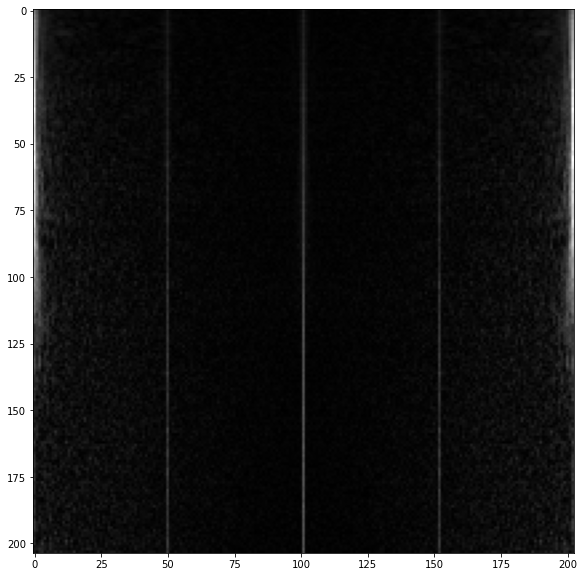

In [110]:
fft_im = np.absolute(fft(image1, axis=1))
plt.figure(figsize=(10, 10))
plt.imshow(fft_im[:, 1:], "gray")

In [111]:
list(enumerate(np.mean(fft_im[:, :], axis=0)))

[(0, 15128.161764705883),
 (1, 2138.0979304797183),
 (2, 1042.4083945024856),
 (3, 708.6514472685934),
 (4, 551.4283162175292),
 (5, 458.8815890806811),
 (6, 384.3865497067025),
 (7, 329.64195326425363),
 (8, 324.09153274253134),
 (9, 304.49114011812264),
 (10, 259.0319305312401),
 (11, 252.87224290535747),
 (12, 231.71472011317286),
 (13, 255.31598282321298),
 (14, 245.95755550379897),
 (15, 212.279961312557),
 (16, 203.5904062432077),
 (17, 212.1916403702881),
 (18, 208.83967428698818),
 (19, 215.1218720052622),
 (20, 193.71809374211273),
 (21, 210.84842370258448),
 (22, 198.53072936330832),
 (23, 195.90992401341688),
 (24, 180.1009328259476),
 (25, 194.5829456119535),
 (26, 182.44106249106073),
 (27, 175.5982178696568),
 (28, 166.2928613686916),
 (29, 160.36782171905617),
 (30, 176.38707624593982),
 (31, 166.2298566158893),
 (32, 168.7910858426357),
 (33, 169.64580998154545),
 (34, 155.82789408098802),
 (35, 168.5194290080086),
 (36, 150.70576448375803),
 (37, 159.51841772554656),
 

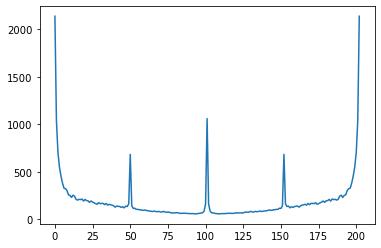

In [112]:
plt.plot(np.mean(fft_im[:, 1:], axis=0))

In [122]:
def remove_periodic_noise(image):
    fft_im = fft(image, axis=1)

    print(image.shape[1])
    central_frequency = int(image.shape[1] / 2)
    print(central_frequency)
    lower_harmonic = int(central_frequency / 2)
    print(lower_harmonic)
    # lower_harmonic2 = int(central_frequency / 4)
    # lower_harmonic3 = int(3 * central_frequency / 4)
    upper_harmonic = int(3 * central_frequency / 2)
    print(upper_harmonic)
    # upper_harmonic2 = int(5 * central_frequency / 4)
    # upper_harmonic3 = int(7 * central_frequency / 4)
    fft_im[:, central_frequency:central_frequency+1] = 0
    fft_im[:, lower_harmonic:lower_harmonic+1] = 0
    fft_im[:, upper_harmonic:upper_harmonic+1] = 0
    # fft_im[:, central_frequency] = (fft_im[:, central_frequency-1] + fft_im[:, central_frequency+1]) / 2
    # fft_im[:, lower_harmonic - 1:lower_harmonic + 2] = np.outer((fft_im[:, lower_harmonic-2] + fft_im[:, lower_harmonic+2]) / 2, np.ones(3, ))
    # fft_im[:, upper_harmonic - 1:upper_harmonic + 2] = np.outer((fft_im[:, upper_harmonic-2] + fft_im[:, upper_harmonic+2]) / 2, np.ones(3, ))
    # fft_im[:, lower_harmonic2 - 4:lower_harmonic2 + 4] = 0
    # fft_im[:, lower_harmonic3 - 4:lower_harmonic3 + 4] = 0
    # fft_im[:, upper_harmonic2 - 4:upper_harmonic2 + 4] = 0
    # fft_im[:, upper_harmonic3 - 4:upper_harmonic3 + 4] = 0
    new_im = ifft(fft_im, axis=1).real
    #new_im = sk_fi.gaussian(new_im)
    return new_im

/home/julius/miniconda3/envs/tf-test/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/julius/miniconda3/envs/tf-test/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


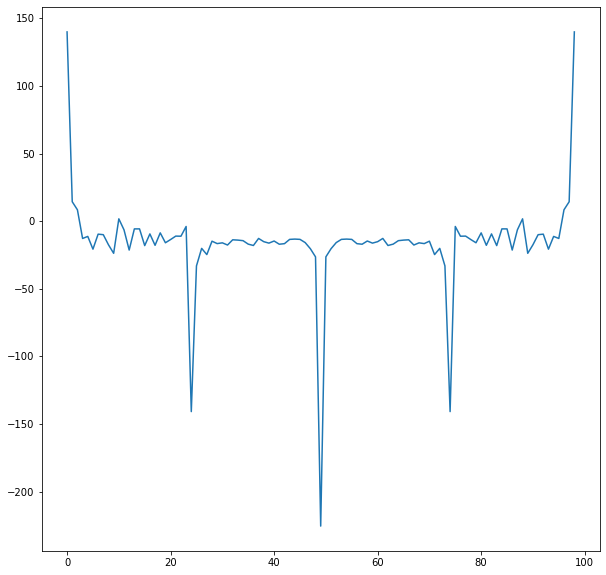

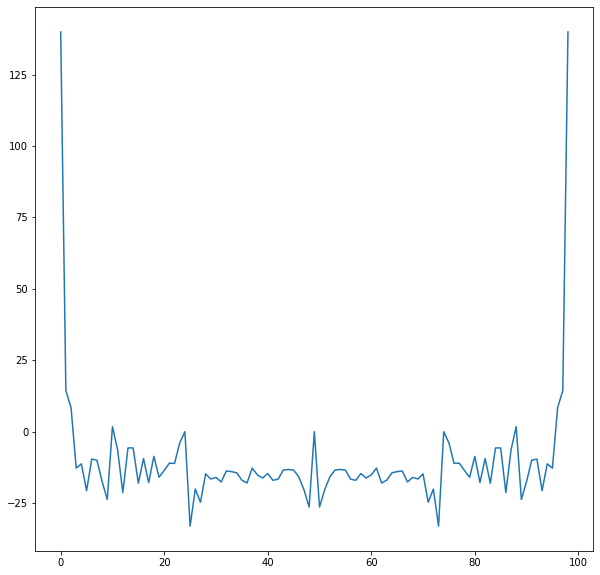

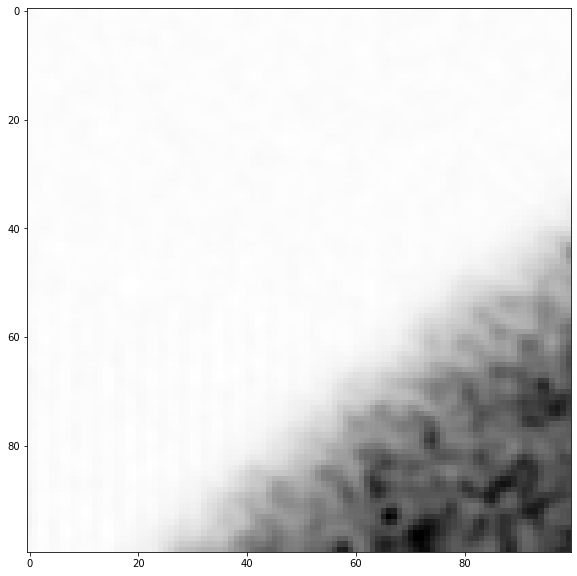

In [147]:
image2 = image1[:100, :100]
fft_im = fft(image2, axis=1)
plt.figure(figsize=(10, 10))
plt.plot(np.mean(fft_im[:, 1:], axis=0))

central_frequency = int(image2.shape[1] / 2)
lower_harmonic = int(central_frequency / 2)
upper_harmonic = int(3 * central_frequency / 2)

fft_im[:, central_frequency:central_frequency+1] = 0
fft_im[:, lower_harmonic:lower_harmonic+1] = 0
fft_im[:, upper_harmonic:upper_harmonic+1] = 0
plt.figure(figsize=(10, 10))
plt.plot(np.mean(fft_im[:, 1:], axis=0))
new_im = ifft(fft_im, axis=1).real
new_im = sk_fi.gaussian(new_im)
plt.figure(figsize=(10, 10))
plt.imshow(new_im[:100, :100], "Greys")

204
102
51
153


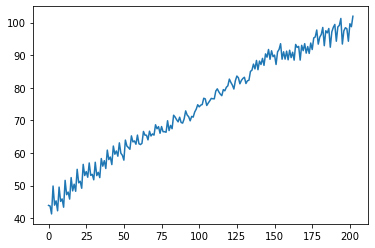

In [124]:
#a = remove_periodic_noise(image1)
plt.plot(np.mean(remove_periodic_noise(image1)[:, 1:], axis=0))

102
51
153


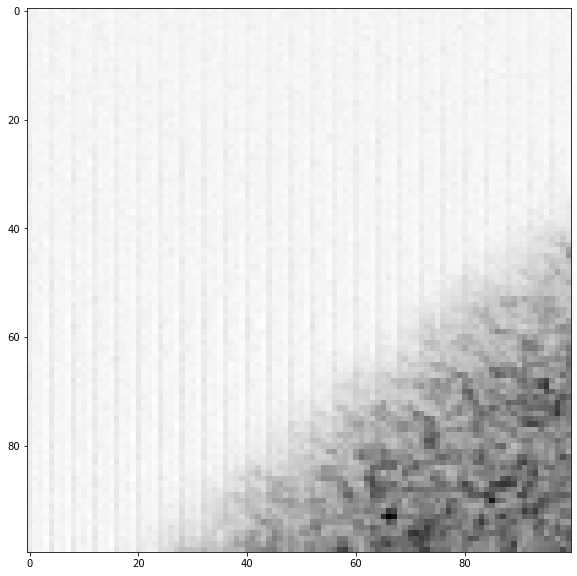

In [119]:
plt.figure(figsize=(10, 10))
plt.imshow(remove_periodic_noise(image1)[:100, :100], "Greys")

In [29]:
int(45.7)

45

In [63]:
np.fft.fftfreq(50)

array([ 0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,
        0.18,  0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,
        0.36,  0.38,  0.4 ,  0.42,  0.44,  0.46,  0.48, -0.5 , -0.48,
       -0.46, -0.44, -0.42, -0.4 , -0.38, -0.36, -0.34, -0.32, -0.3 ,
       -0.28, -0.26, -0.24, -0.22, -0.2 , -0.18, -0.16, -0.14, -0.12,
       -0.1 , -0.08, -0.06, -0.04, -0.02])

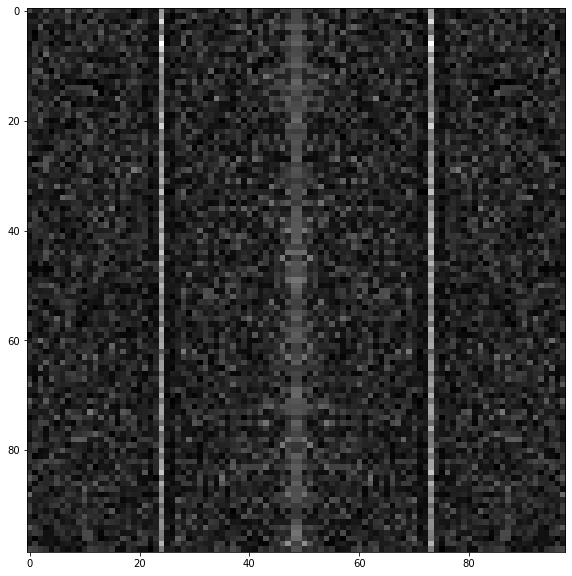

In [33]:
fft_im = np.absolute(fft(remove_periodic_noise(image1), axis=1))
plt.figure(figsize=(10, 10))
plt.imshow(fft_im[:, 1:], "gray")

In [48]:
(fft_im[:, central_frequency-1] + fft_im[:, central_frequency+1]) / 2

NameError: name 'central_frequency' is not defined

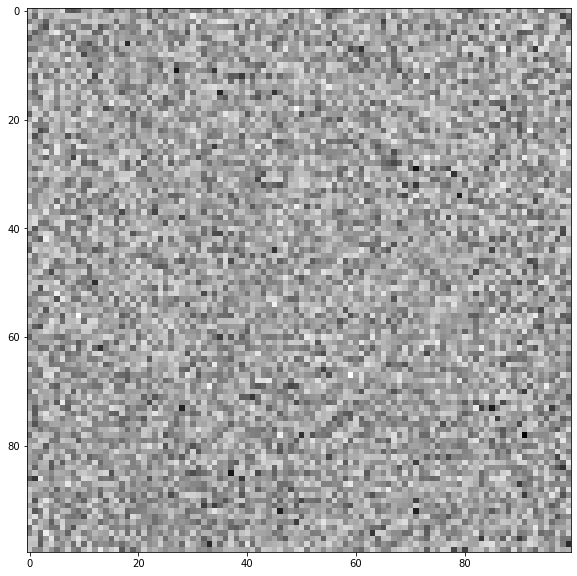

In [56]:
fft_im = fft(image1, axis=1)
central_frequency = int(image.shape[1] / 2)
lower_harmonic = int(central_frequency / 2)
upper_harmonic = int(3 * central_frequency / 2)

fft_im[:, central_frequency] = (fft_im[:, central_frequency-1] + fft_im[:, central_frequency+1]) / 2
fft_im[:, lower_harmonic - 1:lower_harmonic + 2] = np.outer((fft_im[:, lower_harmonic-2] + fft_im[:, lower_harmonic+2]) / 2, np.ones(3, ))
fft_im[:, upper_harmonic - 1:upper_harmonic + 2] = np.outer((fft_im[:, upper_harmonic-2] + fft_im[:, upper_harmonic+2]) / 2, np.ones(3, ))

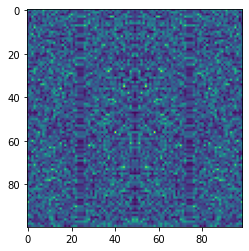

In [57]:
plt.figure(figsize=(10, 10))
plt.imshow(image1, "Greys")

/tmp/ipykernel_9372/2409408687.py:13: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  plt.imshow(sk_fi.rank.mean(image/image.max(), np.ones((4, 4))), "gray")


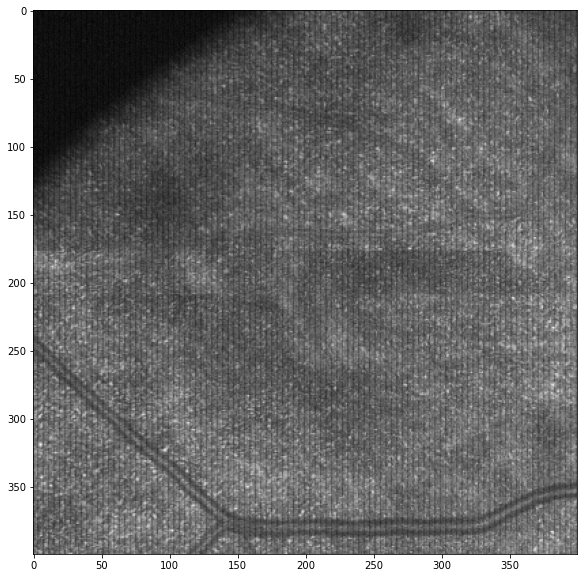

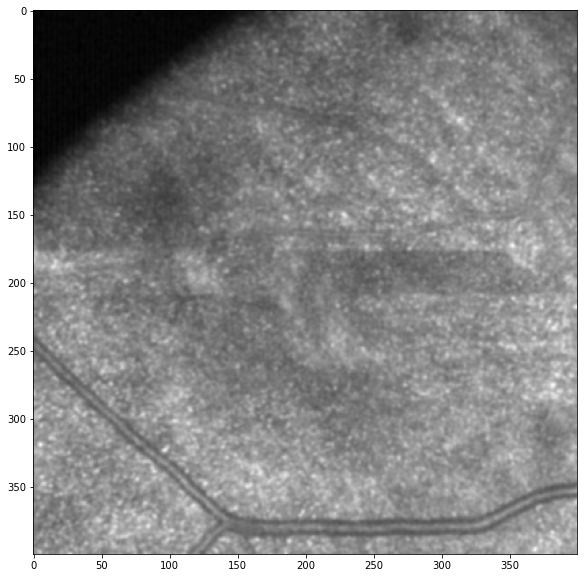

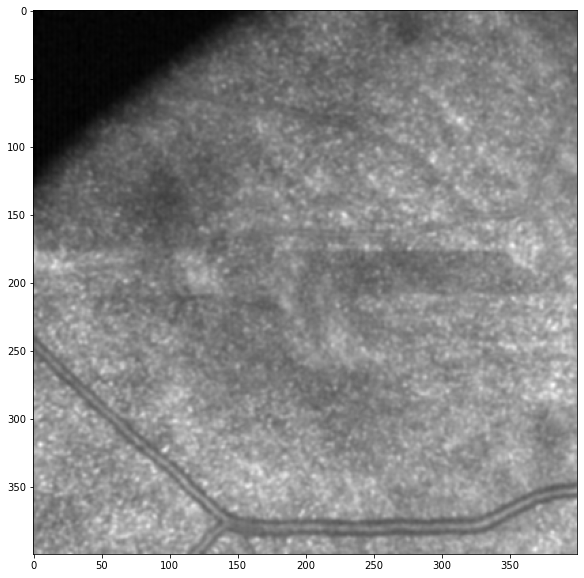

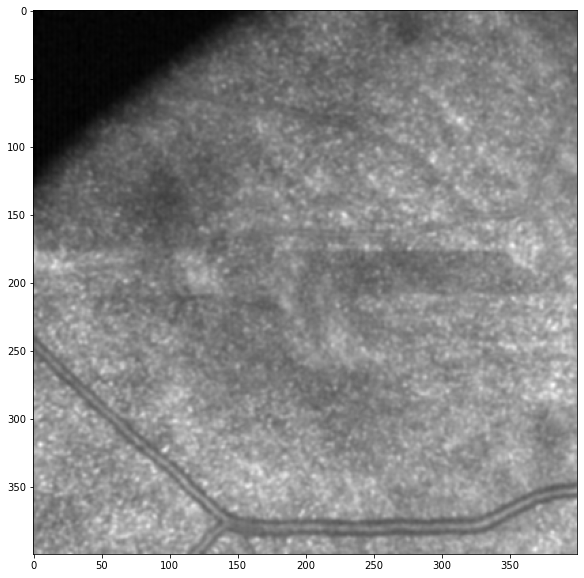

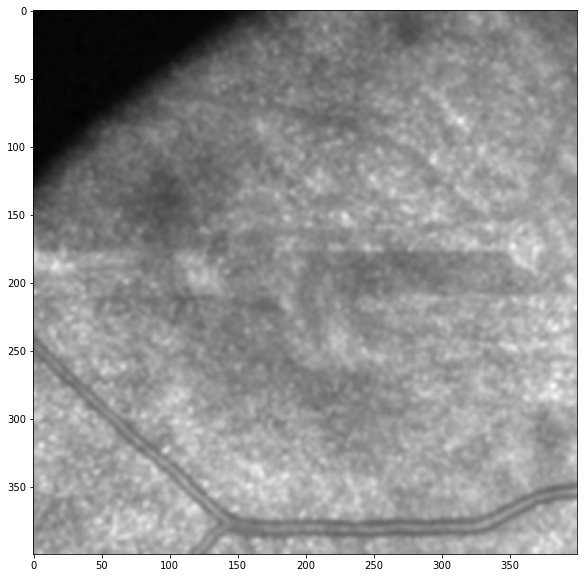

In [36]:
for file in file_list:
    image = sk_io.imread(file[0])[200:600, 200:600]
    plt.figure(figsize=(10, 10))
    plt.imshow(image, "gray")
    image = remove_periodic_noise(image)
    plt.figure(figsize=(10, 10))
    plt.imshow(image, "gray")
    plt.figure(figsize=(10, 10))
    plt.imshow(sk_fi.gaussian(image, sigma=0.5), "gray")
    plt.figure(figsize=(10, 10))
    plt.imshow(sk_fi.gaussian(image, sigma=0.5), "gray")
    plt.figure(figsize=(10, 10))
    plt.imshow(sk_fi.rank.mean(image/image.max(), np.ones((4, 4))), "gray")
    break